In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
from myusefultools import parser

In [2]:
!pwd

/home/edsaac/Repos/ReactiveBiomass/experiments/BenMoshe_2020


In [9]:
vtk_files = parser.getVTKList("SW150/VTK")
times_seconds = parser.getTimeList("SW150")

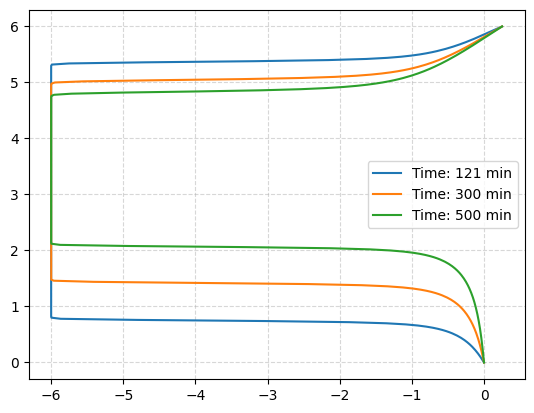

In [10]:
which_times = [5, 14, 24]

fig,ax = plt.subplots()

for wt in which_times:

    mesh = pv.read("SW150/VTK/" + vtk_files[wt])

    line = pv.Line(
    a:=[0, 0, mesh.bounds[5]],
    b:=[0, 0, mesh.bounds[2]])
    
    sample = mesh.sample_over_line(a,b)
    
    ax.plot(sample["h"], sample.points[:, 2], label=f"Time: {float(times_seconds[wt])/60:.0f} min")
    # ax.plot(sample["hydraulicCond"]*100*60, sample.points[:, 2], label=f"Time: {float(times_seconds[wt])/60:.0f} min")
    
ax.legend()
ax.grid(True, ls='dashed', alpha=0.5)
# ax.set_xscale('log')
plt.show()


In [5]:
from pandas import read_csv
hydrus_data = read_csv("profileshydrus.txt")

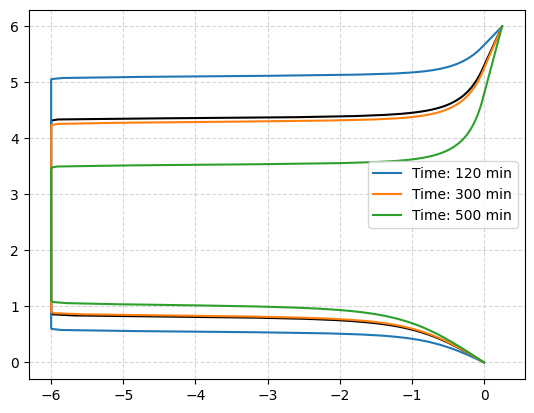

In [6]:
vtk_files = parser.getVTKList("SW150/VTK_prev")
times_seconds = parser.getTimeList("SW150")

which_times = [5, 14, 24]

fig,ax = plt.subplots()

ax.plot(readh:=hydrus_data["C3"]/100, 6+hydrus_data["C4"]/100, c='k', label="Hydrus 120")

for wt in which_times:

    mesh = pv.read("SW150/VTK_prev/" + vtk_files[wt])

    line = pv.Line(
    a:=[0, 0, mesh.bounds[5]],
    b:=[0, 0, mesh.bounds[2]])
    
    sample = mesh.sample_over_line(a,b)
    
    ax.plot(sample["h"], sample.points[:, 2], label=f"Time: {float(times_seconds[wt])/60:.0f} min")
    # ax.plot(sample["hydraulicCond"]*100*60, sample.points[:, 2], label=f"Time: {float(times_seconds[wt])/60:.0f} min")
    if wt == 5:
        hdata = sample["h"]

ax.legend()
ax.grid(True, ls='dashed', alpha=0.5)
# ax.set_xscale('log')
plt.show()


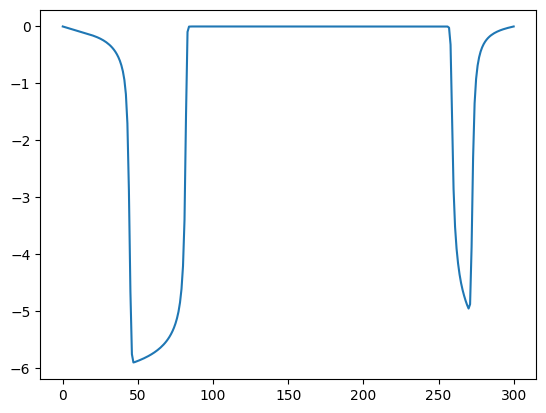

In [32]:
plt.plot(np.array(hdata)-readh)